# Statistics for the Top 10 songs of various spotify artists and their YouTube video.
In this project, we aimed to analyze the relationship between YouTube views and various audio features of the top 10 songs of various Spotify artists. We collected and cleaned the data using libraries such as pandas, and conducted the analysis using libraries like Matplotlib and Seaborn. The findings revealed that there was a weak positive correlation between the tempo and loudness of the songs and their YouTube views, indicating that songs with higher tempo and loudness tend to have more views on YouTube. These insights can be valuable for artists and music producers looking to create music that appeals to a broad audience and gains more popularity. Overall, this project highlights the importance of audio features in the success of a song on a popular platform like YouTube, and the role that data analysis can play in understanding and improving music production.

##Select a real-world dataset

In [3]:
!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## Downloading the Dataset

The dataset is downloaded from kaggle. The link for dataset is [link text](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:

dataset_url = 'https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prabhiraj
Your Kaggle Key: ··········


100%|██████████| 8.95M/8.95M [00:00<00:00, 62.3MB/s]

###The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = '/content/spotify-and-youtube'

In [7]:
import os
os.listdir(data_dir)

['Spotify_Youtube.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "spotify-and-youtube-zerotopandas-course-project" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploring Dataset
Let's load the CSV files using the Pandas library. We'll use the name "raw_data_df" for the data frame to indicate this is unprocessed data that we might clean, filter and modify to prepare a data frame ready for analysis. So we have to extract a copy of data frame and name it as "data_df". We'll perform data preparation and cleaning operations on "data_df" and leave the raw data frame untouched and unmodified.

In [12]:
import pandas as pd

In [13]:
file_path='/content/spotify-and-youtube/Spotify_Youtube.csv'

In [14]:
data_df=pd.read_csv(file_path)

In [15]:
data_df

Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Good Inc.   
1                                    Rhinestone Eyes   
2      New Gold (feat. Tame Impala and Bootie Brown)   
3                                 On Melancholy Hill   
4                                     Clint Eastwood   
...                                              ...   
20713                           JUST DANCE HARDSTYLE   
20714                 SET FIRE TO THE RAIN HARDSTYLE   
20715                      OUTSIDE HARDSTYLE SPED UP   
20716                            ONLY GIRL HARDSTYLE   
20717                             MISS YOU HARDSTYLE   

                                               Album Album_type  \
0                                         Demon Days      album   
1                                      Plastic Beach      album   
2      New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                      Plastic Beach      album   
4                                           Gorillaz      album   
...                                              ...        ...   
20713                           JUST DANCE HARDSTYLE     single   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single   
20715                      OUTSIDE HARDSTYLE SPED UP     single   
20716                            ONLY GIRL HARDSTYLE     single   
20717                             MISS YOU HARDSTYLE     single   

                                        Uri  Danceability  Energy   Key  ...  \
0      spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1      spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2      spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3      spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4      spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   
...                                     ...           ...     ...   ...  ...   
20713  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   5.0  ...   
20714  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   4.0  ...   
20715  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   4.0  ...   
20716  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   9.0  ...   
20717  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   6.0  ...   

                                       Url_youtube  \
0      https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1      https://www.youtube.com/watch?v=yYDmaexVHic   
2      https://www.youtube.com/watch?v=qJa-VFwPpYA   
3      https://www.youtube.com/watch?v=04mfKJWDSzI   
4      https://www.youtube.com/watch?v=1V_xRb0x9aw   
...                                            ...   
20713  https://www.youtube.com/watch?v=5SHmKFKlNqI   
20714 

###Cleaning Dataset

###**Data Preparation and Cleaning**

Importing pandas and transforming csv into Dataframe



####Checking number of Na in dataset

In [16]:
data_df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [17]:
#cheking Datatype of every values
data_df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

Views is object type nees to chande into float

In [18]:
data_df['Track']=data_df['Track'].astype(str)

####Replacing Na with values

In [19]:
#cleaning data 
#loudness
data_df.Loudness.fillna(data_df['Loudness'].mean(),inplace=True) 
colum=['Url_youtube','Title','Channel','Description','Licensed','official_video','Stream']  
for i in  colum:
  data_df[i].fillna('unknown',inplace=True)
#colum need t be replaced by mean
mean_colum=['Danceability','Energy','Key','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Duration_ms','Views','Likes']
for i in mean_colum:
  data_df[i].fillna(data_df[i].mean(),inplace=True)

In [20]:
data_df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [21]:
data_df.describe()

Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  20718.000000  20718.000000  20718.000000  20718.000000  20718.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165264      0.214136      3.576276      4.632525   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518250      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536500   
75%    15537.750000      0.740000      0.798000      8.000000     -4.931250   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20718.000000  20718.000000      20718.000000  20718.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111955      0.286285          0.193253      0.168523   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.045200          0.000000      0.094125   
50%        0.050500      0.193000          0.000002      0.125000   
75%        0.103000      0.477000          0.000463      0.237000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence        Tempo   Duration_ms         Views         Likes  \
count  20718.000000  20718.00000  2.071800e+04  2.071800e+04  2.071800e+04   
mean       0.529853    120.63834  2.247176e+05  9.393782e+07  6.633411e+05   
std        0.245429     29.57759  1.247845e+05  2.715111e+08  1.765807e+06   
min        0.000000      0.00000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     97.00200  1.800100e+05  1.950563e+06  2.302175e+04   
50%        0.537000    119.96550  2.132910e+05  1.572401e+07  1.354555e+05   
75%        0.726000    139.93500  2.524422e+05  7.798379e+07  5.897498e+05   
max        0.993000    243.37200  4.676058e+06  8.079649e+09  5.078865e+07   

           Comments  
count  2.014900e+04  
mean   2.751899e+04  
std    1.932347e+05  
min    0.000000e+00  
25%    5.090000e+02  
50%    3.277000e+03  
75%    1.436000e+04  
max    1.608314e+07

In [22]:
import jovian

In [23]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Analysis and Visualization

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.



In [24]:
import seaborn as sns #imported seaborn
import matplotlib   
import matplotlib.pyplot as plt
%matplotlib inline


Finding the most played song 

Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'

In [25]:
#to sort1st 10 top song
top_album_df=(data_df.sort_values(by='Views',ascending=False))[:100]

In [26]:
top_album_df['Track']=top_album_df['Track'].astype(str)
top_album_df['Track']

1147                                   Despacito
365                                    Despacito
12452                               Shape of You
14580         See You Again (feat. Charlie Puth)
12469         See You Again (feat. Charlie Puth)
                          ...                   
47                          Hymn for the Weekend
15267                              Felices los 4
16250    Déjala Que Vuelva (feat. Manuel Turizo)
14043                       Just the Way You Are
254                                Cheap Thrills
Name: Track, Length: 100, dtype: object

###Top 100 track with most views.
The track in first position is Despacito. Despacito is a Spanish-language song by Puerto Rican singer Luis Fonsi featuring Puerto Rican rapper Daddy Yankee.

In [27]:
#data_df['Track'].groupby('Artist').count()
data_df.groupby('Artist')['Track'].count()[10:100]


Artist
24kGoldn               10
2Pac                   10
3 Doors Down           10
42 Dugg                10
5 Seconds of Summer    10
                       ..
Ana Castela            10
Ana Gabriel            10
Ana Mena               10
Anahí                  10
Ananya Bhat             7
Name: Track, Length: 90, dtype: int64

<ipython-input-28-7ac75e14a8e0>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o--r" (-> color='r'). The keyword argument will take precedence.
  plt2.plot(top_album_df['Track'],top_album_df['Likes'],'o--r',color='red');
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core

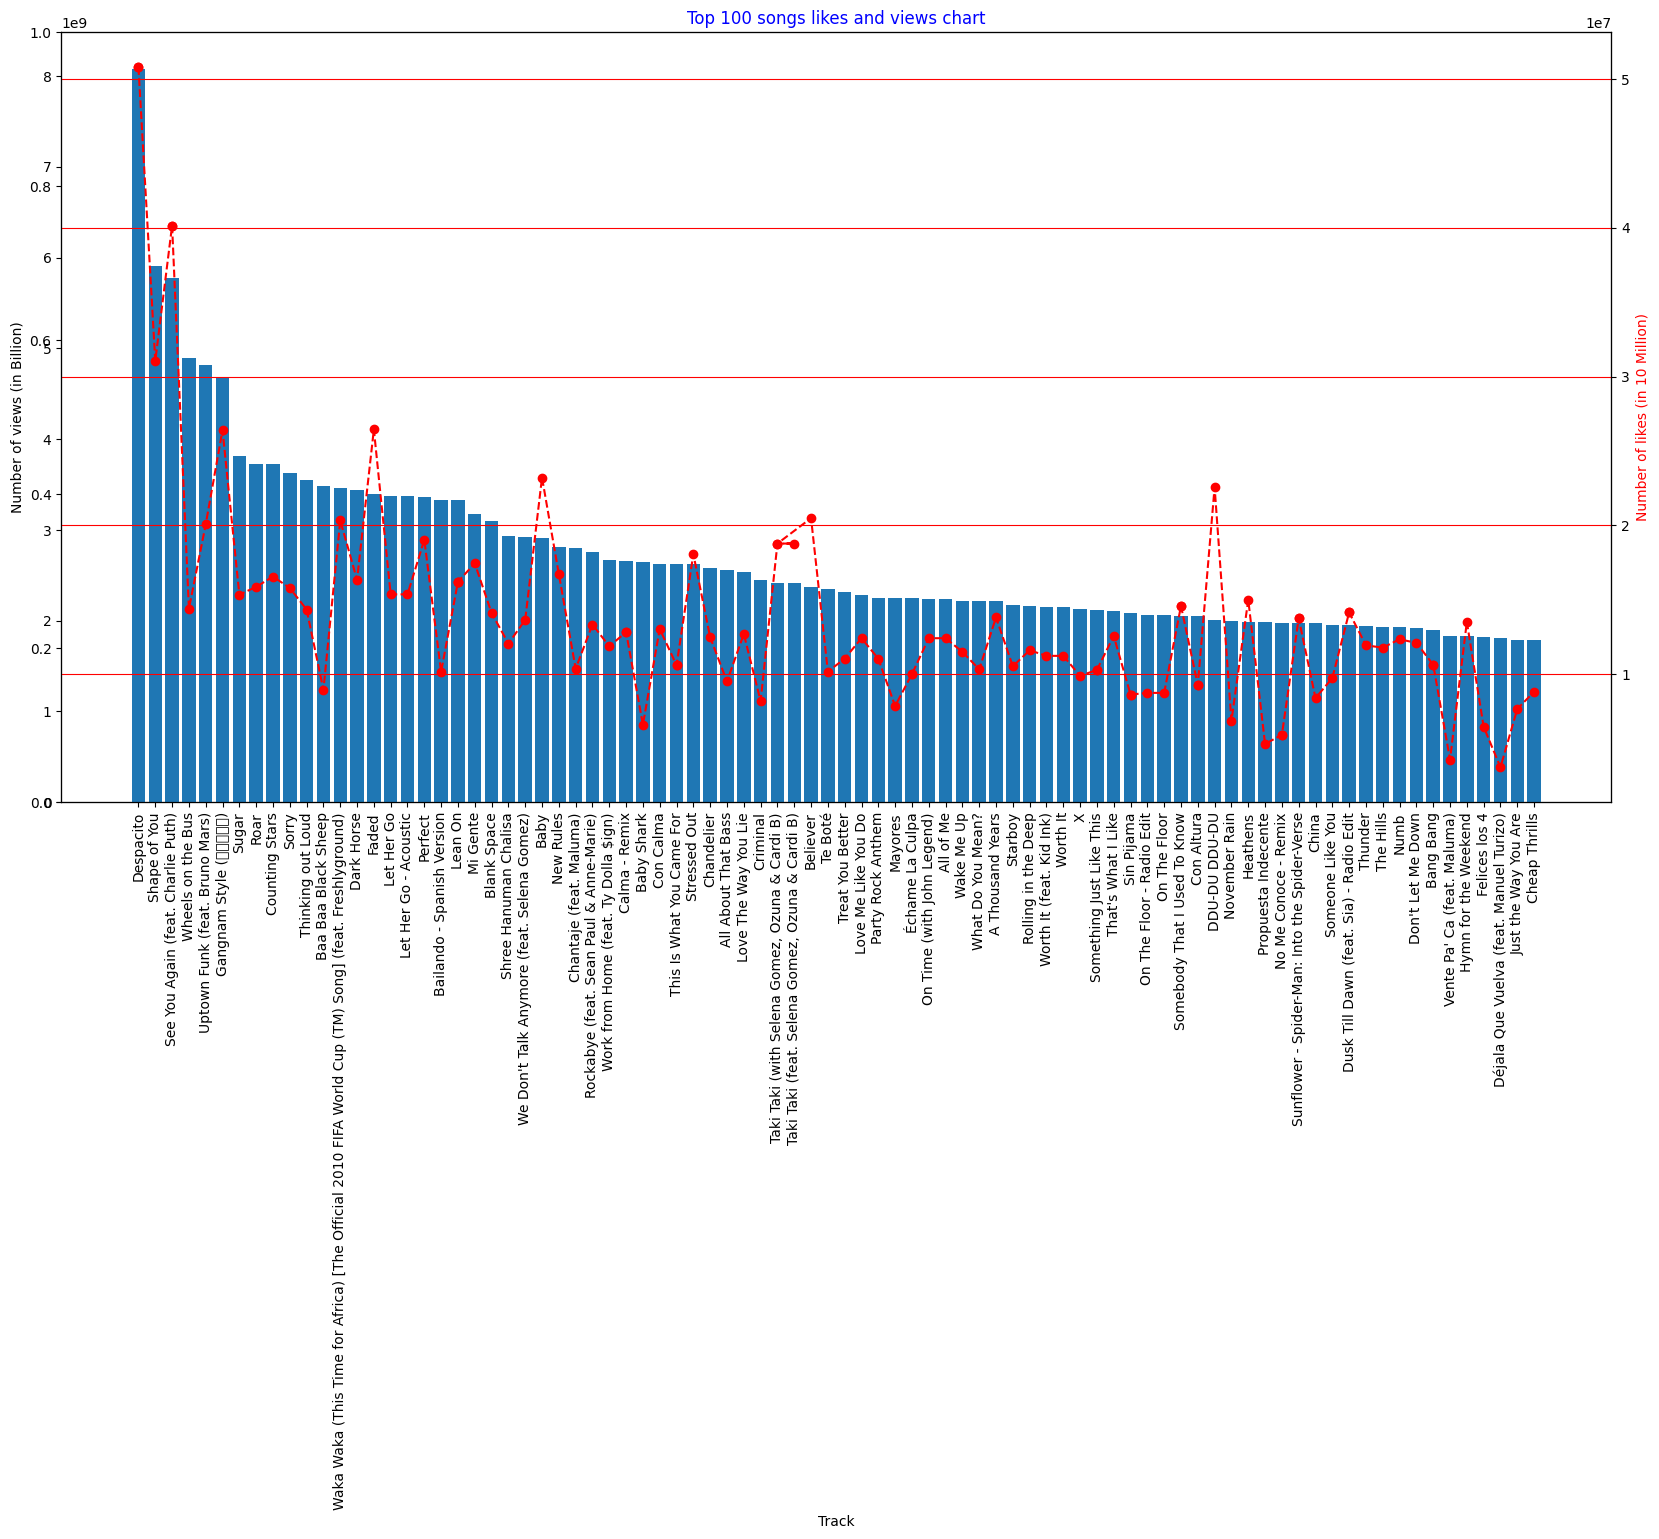

In [28]:
plt.figure(figsize=(20,10))
plt.xlabel('Track');
plt.ylabel('Number of views (in Billion)');
plt.title('Top 100 songs likes and views chart',color='blue');
#plt.legend()
plt.xticks(rotation=90);
pl2=plt.twinx();
plt.bar(top_album_df['Track'],top_album_df['Views'],label=top_album_df['Album_type']);
plt2=plt.twinx();
plt2.set_ylabel("Number of likes (in 10 Million)",color='red');
plt2.grid(True,axis='both',color='red');
pl2.patch.set_facecolor("lightgray");
plt2.plot(top_album_df['Track'],top_album_df['Likes'],'o--r',color='red');
#plt.xtricks(torotation=90);


###Number of views each artist got

In [29]:
for i in range(0,len(data_df['Artist'])): #code to replace $ with s in artist
  data_df['Artist'][i]=data_df['Artist'][i].replace('$','s')
for i in range(0,len(data_df['Channel'])): #code to replace $ with s in artist
   data_df['Channel'][i]=data_df['Channel'][i].replace('$','s')

<ipython-input-29-7ecf9504902b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Artist'][i]=data_df['Artist'][i].replace('$','s')
<ipython-input-29-7ecf9504902b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Channel'][i]=data_df['Channel'][i].replace('$','s')


In [30]:
artist_views = data_df[data_df['Views'] > 1748130945.0].groupby('Artist')['Views'].sum()

#new df with view greater than average view

In [31]:
artist_views.index

Index(['Adele', 'Alan Walker', 'Avicii', 'BLACKPINK', 'Becky G', 'Bruno Mars',
       'Calvin Harris', 'Charlie Puth', 'Christina Perri', 'Clean Bandit',
       'CoComelon', 'Coldplay', 'DJ Snake', 'Daddy Yankee', 'Darell',
       'Demi Lovato', 'Dua Lipa', 'Ed Sheeran', 'Ellie Goulding', 'Eminem',
       'Enrique Iglesias', 'Farruko', 'Fifth Harmony', 'Gotye',
       'Guns N' Roses', 'Hariharan', 'Imagine Dragons', 'J Balvin',
       'Jennifer Lopez', 'Jessie J', 'Jhayco', 'John Legend', 'Justin Bieber',
       'KAROL G', 'Katy Perry', 'Kimbra', 'LMFAO', 'Linkin Park', 'Luis Fonsi',
       'Major Lazer', 'Maluma', 'Mark Ronson', 'Maroon 5', 'Meghan Trainor',
       'MØ', 'Natti Natasha', 'Nicki Minaj', 'Nicky Jam', 'OneRepublic',
       'Ozuna', 'PSY', 'Passenger', 'Pedro Capó', 'Piso 21', 'Post Malone',
       'ROSALÍA', 'Ricky Martin', 'Rihanna', 'Romeo Santos', 'Selena Gomez',
       'Shakira', 'Shawn Mendes', 'Sia', 'Swae Lee', 'Taylor Swift',
       'The Chainsmokers', 'The Weekn

<BarContainer object of 95 artists>

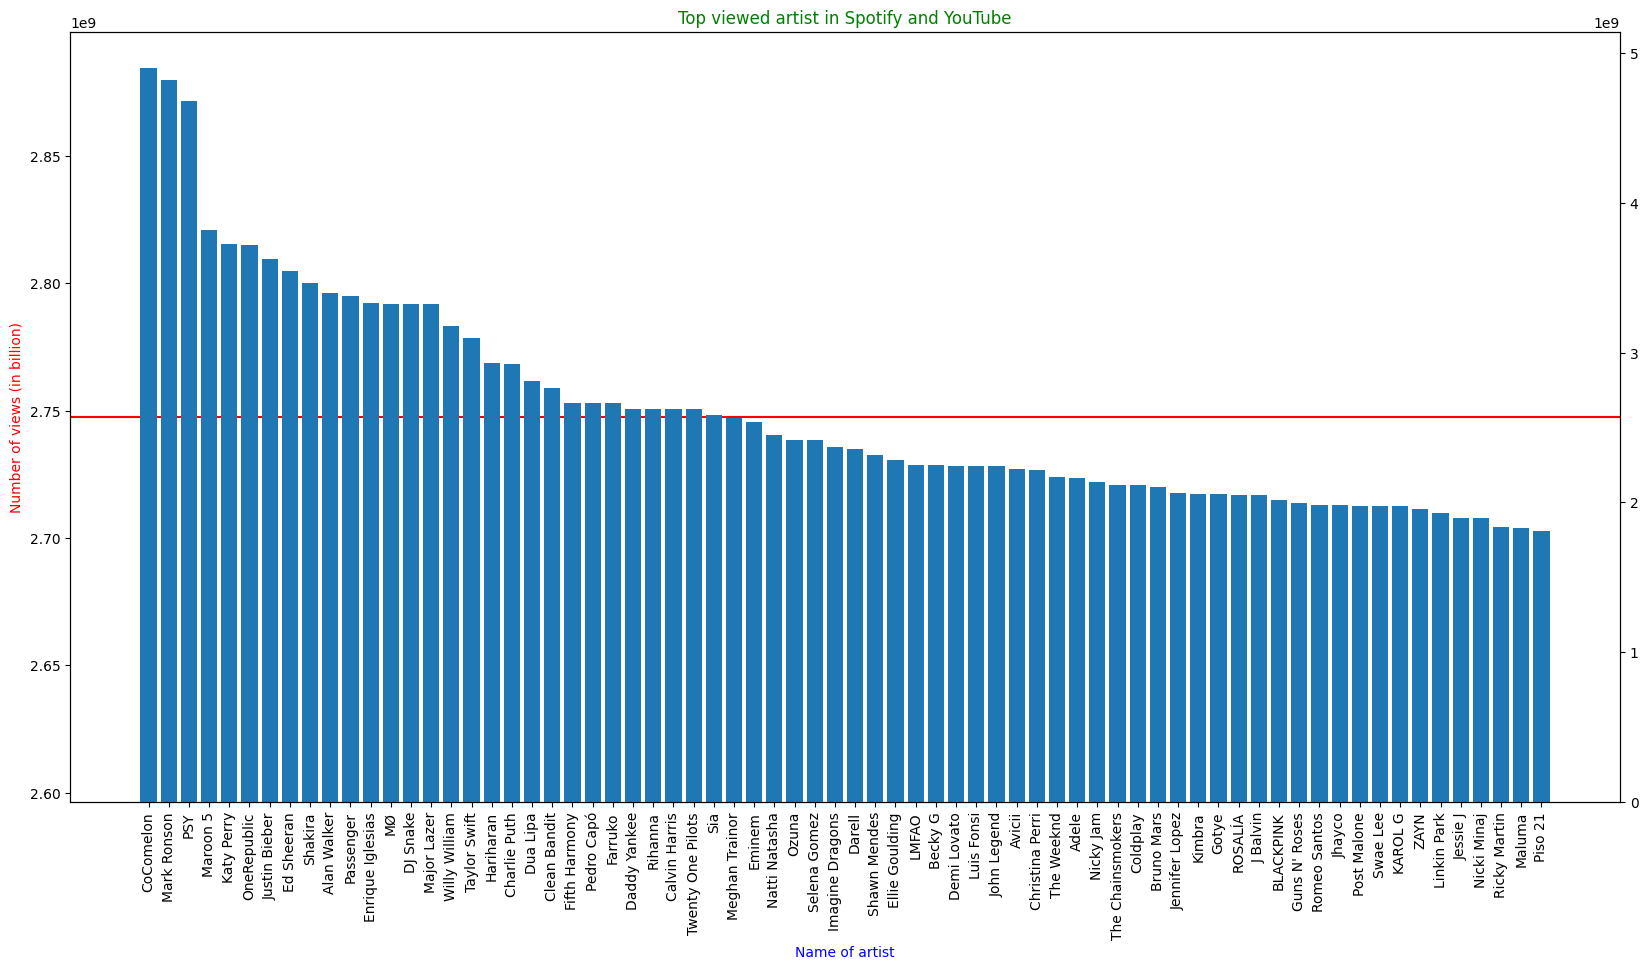

In [32]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Top viewed artist in Spotify and YouTube',color="Green")
plt.ylabel("Number of views (in billion)",color="red")
plt.xlabel("Name of artist",color="blue")
plt.axhline(top_album_df['Views'].mean(),color="red")
plt2=plt.twinx()
plt.bar(top_album_df['Artist'][5:100],top_album_df['Views'][5:100])
#pl2.plot(top_album_df['Artist'],top_album_df['likes'])

In [33]:
#index of max value of dancebility
index_mad_dan=data_df['Danceability'].idxmax()

In [34]:
index_mad_dan

750

In [35]:
data_df.Album_type.unique()

array(['album', 'single', 'compilation'], dtype=object)

###Chart between Danceability and tempo 

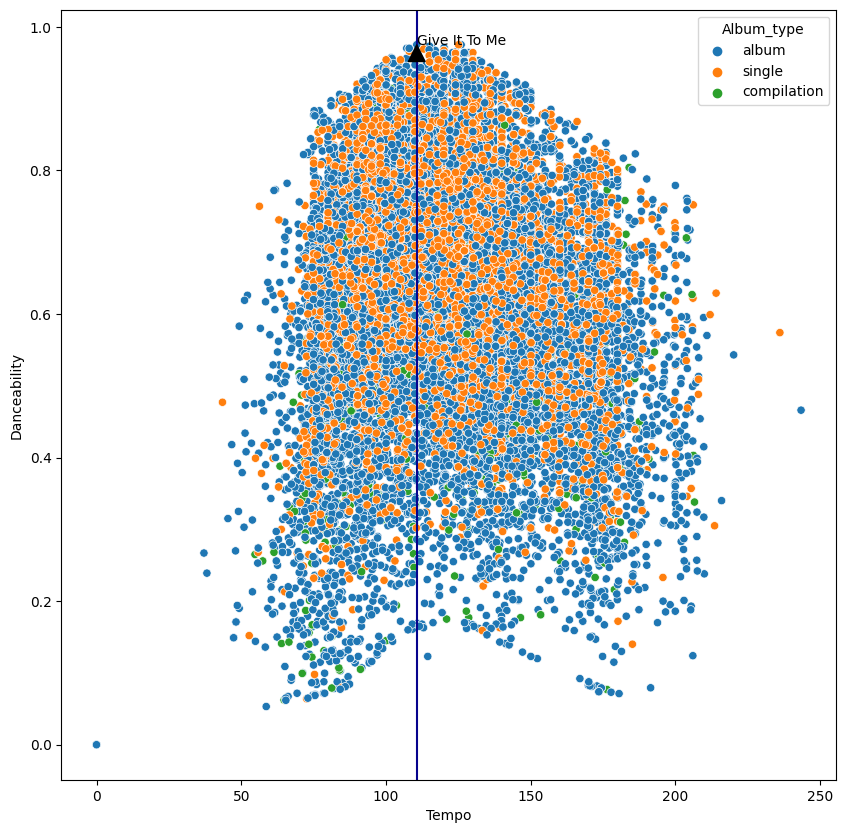

In [36]:
#sns plot toloudness to dancebility
plt.figure(figsize=(10,10))
plt.annotate(data_df.Track[index_mad_dan],xy=(data_df.Tempo[index_mad_dan],data_df.Danceability[index_mad_dan]),arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(data_df.Tempo[index_mad_dan],color='#06038D')
#sns.regplot(x=data_df['Tempo'],y=data_df['Danceability'],data=data_df)
sns.scatterplot(x=data_df['Tempo'],y=data_df['Danceability'],hue=data_df.Album_type);

The chart between tempo and danceabilty is ploted. From the chart we can clearly under stand there is a sweet tempo point for max dancebility. the song "Give to me is the most danceabile song in the data set tempo near to 110

###Chart between Danceability vs views. 

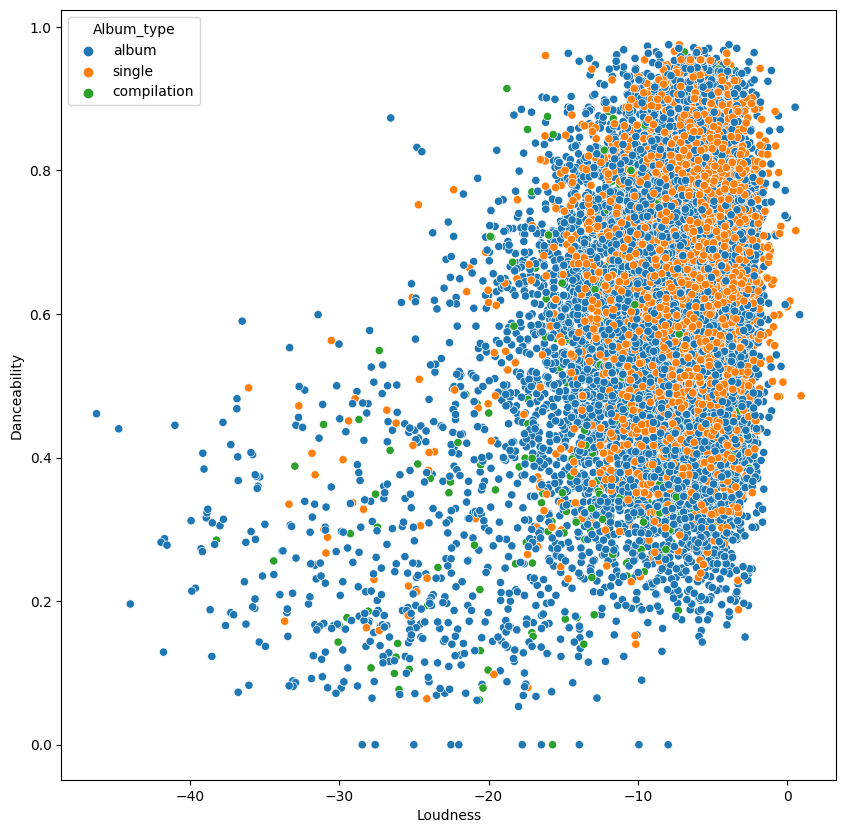

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data_df['Loudness'],y=data_df['Danceability'],hue=data_df.Album_type);

In [38]:
data_df['Energy'].min()


2.03e-05

In [39]:
import numpy as np

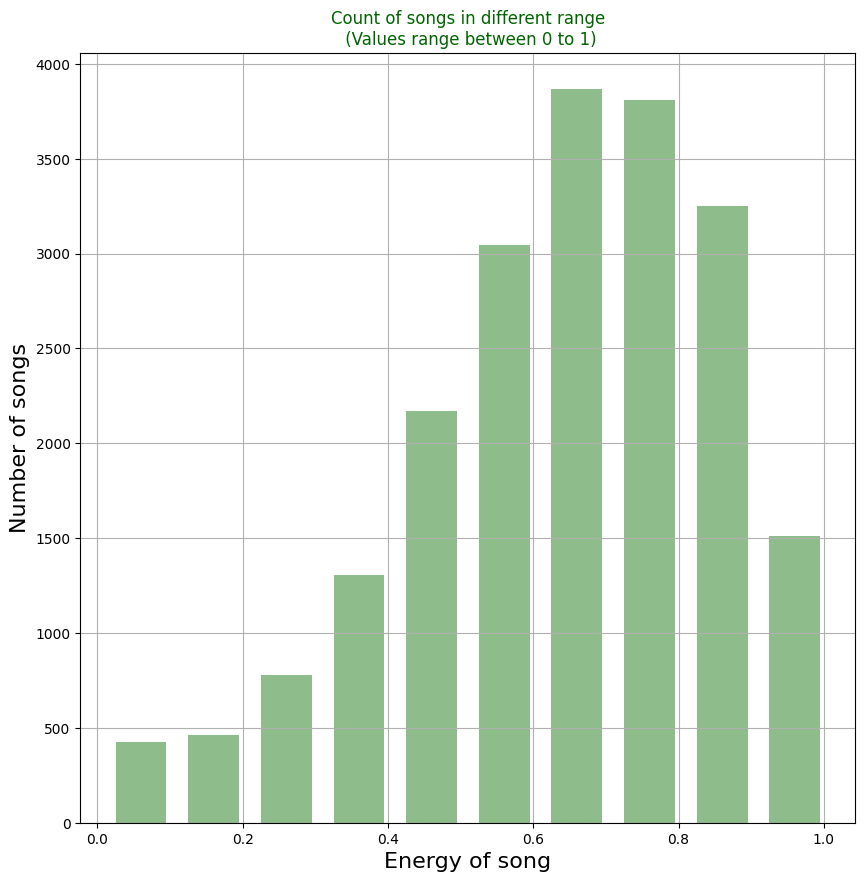

In [40]:
plt.figure(figsize=(10,10))
plt.title("Count of songs in different range\n (Values range between 0 to 1)",color='#006400')
plt.ylabel("Number of songs",fontsize=16)
plt.xlabel('Energy of song',fontsize=16)
plt.grid(True)
plt.hist(data_df.Energy, bins=np.arange(0.01,1.1, 0.1),color ='#8FBC8B',rwidth=0.7);


**TODO** - Scatterplot between number of likes to artist

In [41]:
likes=((data_df.groupby('Artist')['Likes'].sum()).sort_values(ascending=False)).head(100)
list_track=((data_df.groupby('Artist')['Track'].count()).sort_values(ascending=False)).head(100)

<BarContainer object of 100 artists>

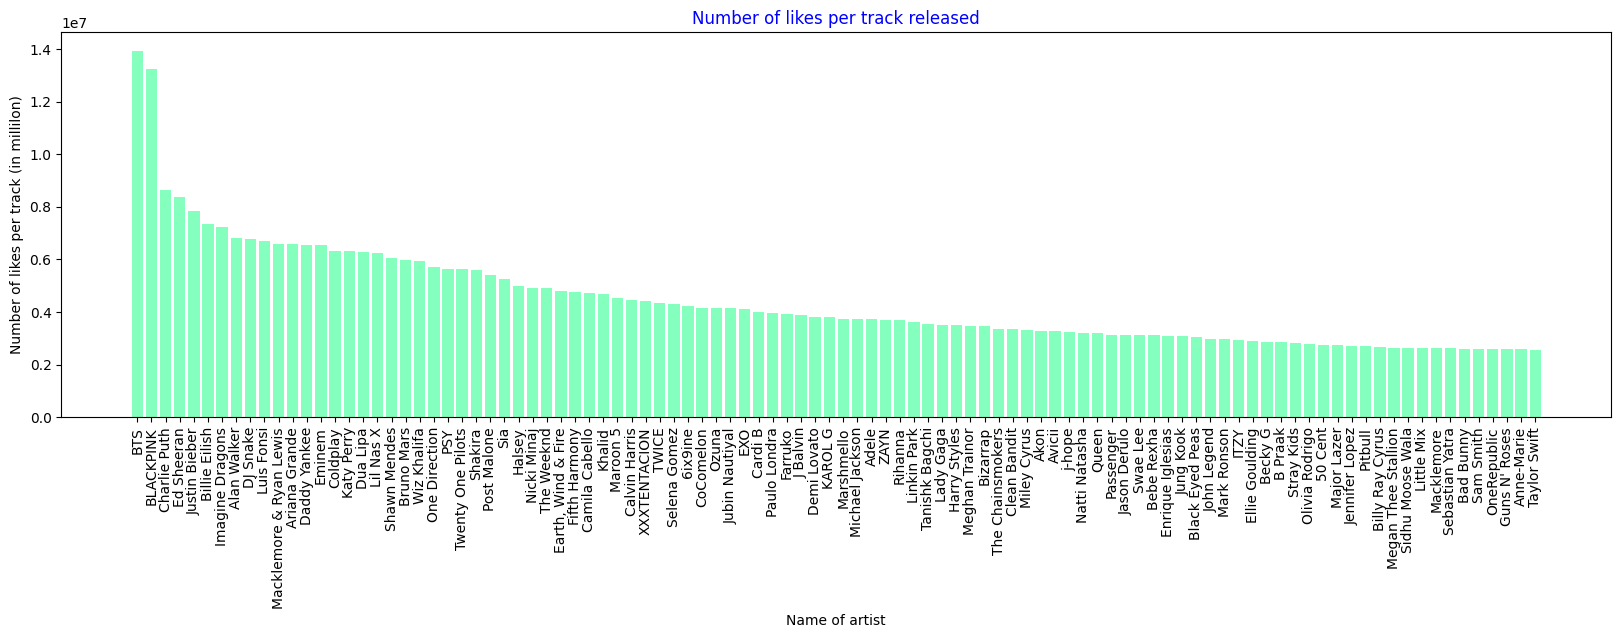

In [42]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.ylabel("Number of likes per track (in millilon)")
plt.xlabel("Name of artist")
plt.title("Number of likes per track released",color="blue")
plt.bar(likes.index,likes.values/list_track.values,color= "#85FFBD")

In [43]:
import jovian

In [44]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


'Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'

In [45]:
data_df.Channel

0                   Gorillaz
1                   Gorillaz
2                   Gorillaz
3                   Gorillaz
4                   Gorillaz
                ...         
20713    SICK LEGEND - Topic
20714    SICK LEGEND - Topic
20715    SICK LEGEND - Topic
20716    SICK LEGEND - Topic
20717    SICK LEGEND - Topic
Name: Channel, Length: 20718, dtype: object

###speechiness and low instrumentalness?

In [46]:
#marking top 5 values
high_speech=data_df.sort_values('Speechiness',ascending=False).head(5) #taking 10 top Speechiness
low_inst=high_speech.sort_values('Instrumentalness',ascending=True).head(5) #taking lowest 5 of top speechiness

In [47]:
data_df['Speechiness'].max()
high_instument=high_speech['Track']

In [48]:
value=str(high_instument[:1]).split("\n")[0] #split function to remove   \n from track name

In [49]:
(value.split('-')[1])

' Sherlock Holmes und der blinde Bettle...'

<Axes: title={'center': 'Speechiness and Instrumentalness'}, xlabel='Instrumentalness', ylabel='Speechiness'>

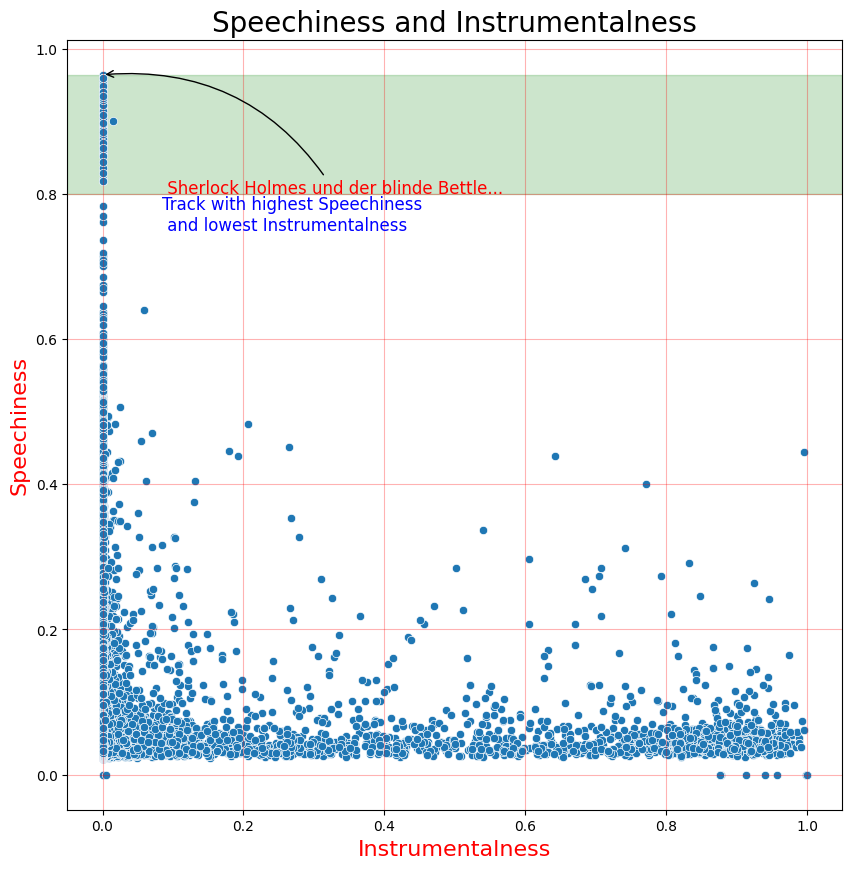

In [50]:
plt.figure(figsize=(10,10))
plt.title("Speechiness and Instrumentalness",fontsize=20)
plt.grid(True,color="red",alpha=0.3)
plt.axhspan(low_inst['Speechiness'].max(),0.8,color="green",alpha=0.2)
plt.annotate((value.split('-')[1]),xy=(low_inst['Instrumentalness'].min(),high_speech['Speechiness'].max()),xytext=(.085, .8),arrowprops=dict(arrowstyle='->',connectionstyle="arc3,rad=0.3"),
           color='red',fontsize=12);
plt.annotate("Track with highest Speechiness \n and lowest Instrumentalness ",xy=(low_inst['Instrumentalness'].min(),high_speech['Speechiness'].max()),xytext=(.085, .75),
           color='blue',fontsize=12);
plt.xlabel("Instrumentalness",color='red',fontsize=16)
plt.ylabel("Speechiness",color='red',fontsize=16)
sns.scatterplot(y=data_df['Speechiness'],x=data_df['Instrumentalness'])


Yes, there are tracks in the dataset that have high speechiness and low instrumentalness. These tracks are characterized by having a significant amount of speech or vocal content and a minimal presence of instrumental or non-vocal elements.

To identify these tracks, you can analyze the dataset by examining the values of the "speechiness" and "instrumentalness" attributes for each track. By setting criteria for what constitutes "high" speechiness and "low" instrumentalness, you can filter the dataset to find the desired tracks.

By applying such filtering, you will be able to identify and retrieve tracks that exhibit a dominant speech or vocal component while having minimal instrumental or non-vocal elements. This can be useful for various purposes, such as analyzing the prevalence of spoken content or identifying tracks that are more focused on vocals rather than instrumentation.

###Artist has the highest average loudness across all their tracks

In [51]:
high_loud_df=data_df[data_df['Loudness']>data_df['Loudness'].mean()] # to create track of above average loudness track

In [52]:
data_df['Loudness'].describe()

count    20718.000000
mean        -7.671680
std          4.632525
min        -46.251000
25%         -8.858000
50%         -6.536500
75%         -4.931250
max          0.920000
Name: Loudness, dtype: float64

In [53]:
len(data_df['Loudness'])

20718

In [54]:
avg_loud_df=(high_loud_df.groupby('Artist')['Loudness'].sum()/high_loud_df.groupby('Artist')['Loudness'].count())
avg_loud_df=avg_loud_df.sort_values(ascending=False)

<BarContainer object of 1910 artists>

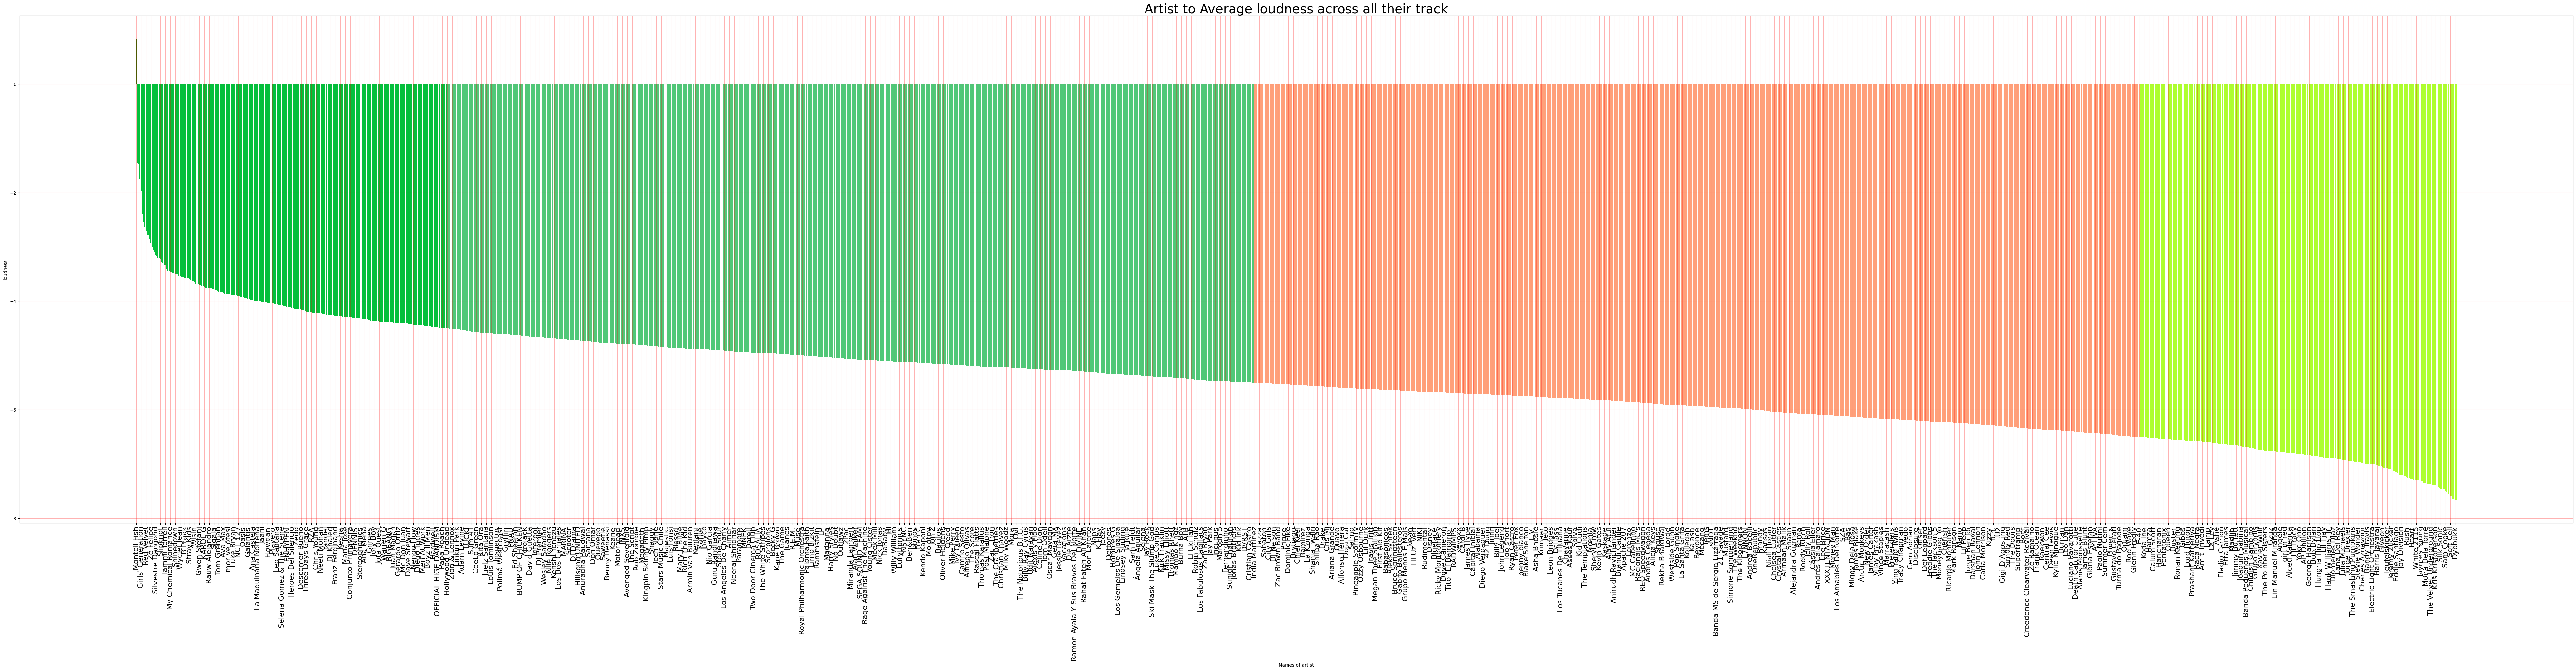

In [55]:

plt.figure(figsize=(100,20))
plt.xticks(rotation=90,fontsize=16)
colors = ['Green' if loudness >0 else '#03C03C' if loudness > -4.5 else "#50C878" if loudness>-5.5 else "#FFA07A"  if loudness>-6.5 else '#ADFF2F' for loudness in avg_loud_df.values]
plt.xticks(ticks=range(0, len(avg_loud_df), 4))
plt.title("Artist to Average loudness across all their track",fontsize=28)
plt.ylabel("loudness")
plt.xlabel("Names of artist")
plt.grid(True,color="red",alpha=0.3)
plt.bar(avg_loud_df.index,avg_loud_df.values,color=colors)

###Do likes or views related to "Album Type"
The release format of a song, whether it's part of an album or released as a single, can have an impact on its publicity and popularity, but there is no definitive rule that determines whether songs released as part of an album will have more views than standalone singles.



In [56]:
album_view=data_df.groupby('Album_type')['Views'].sum();

In [57]:
album_view

Album_type
album          1.467749e+12
compilation    6.301131e+10
single         4.154435e+11
Name: Views, dtype: float64

<BarContainer object of 3 artists>

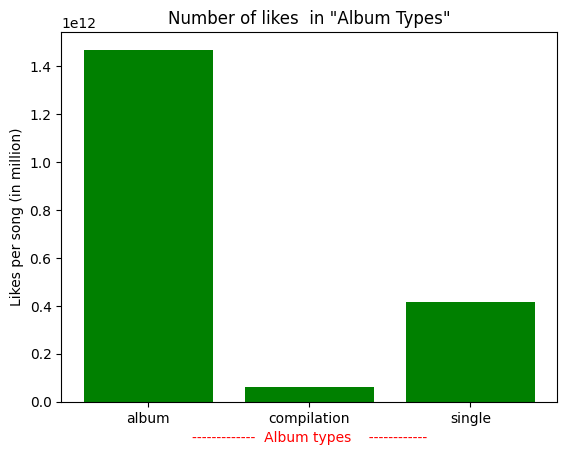

In [58]:
#plt.figure(figsize=(10,10))
plt.title("Number of likes  in \"Album Types\"")
plt.xlabel("-------------  Album types    ------------",color="red")
plt.ylabel("Likes per song (in million)")
plt.bar(album_view.index,album_view.values,color='green') 

When an album is released, it typically contains multiple songs, which can contribute to a higher overall view count. However, it's important to note that views are not directly comparable to likes, as views represent the number of times a song has been played or streamed, while likes indicate the number of people who have expressed their positive opinion or appreciation for a particular song.

To calculate likes per song for different types of releases, we can divide the total number of likes by the number of songs in the album or single. This calculation allows us to determine the average likes received per song, giving us a normalized metric for comparison.

In [59]:
album_count=data_df.groupby('Album_type')['Views'].count();

In [60]:
album_count

Album_type
album          14926
compilation      788
single          5004
Name: Views, dtype: int64

<BarContainer object of 3 artists>

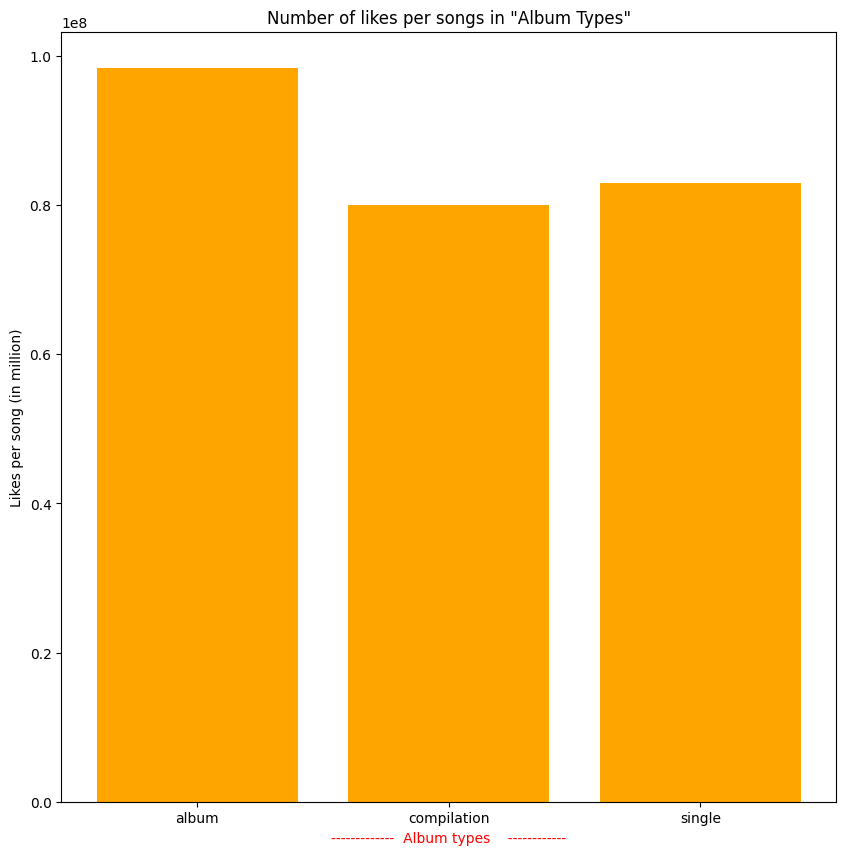

In [61]:
plt.figure(figsize=(10,10))
plt.title("Number of likes per songs in \"Album Types\"")
plt.xlabel("-------------  Album types    ------------",color="red")
plt.ylabel("Likes per song (in million)")
plt.bar(album_view.index,album_view.values/album_count.values,color="orange") 

When a song is part of an album, it can often receive more likes or engagement compared to standalone singles or compilation tracks. One reason for this is that when people discover and enjoy a song from an album, they tend to explore the other songs within the same album

###Relation between Views and all other factor

The relationship between views and all other factors is complex and multifaceted, as various elements such as content quality, audience targeting, promotion, platform algorithms, engagement, and timing can influence the number of views a piece of content receives.


In [62]:
data_df['Duration_ms'].max()

4676058.0

<Axes: title={'center': 'Valence vs views'}, xlabel='Valence', ylabel='Views'>

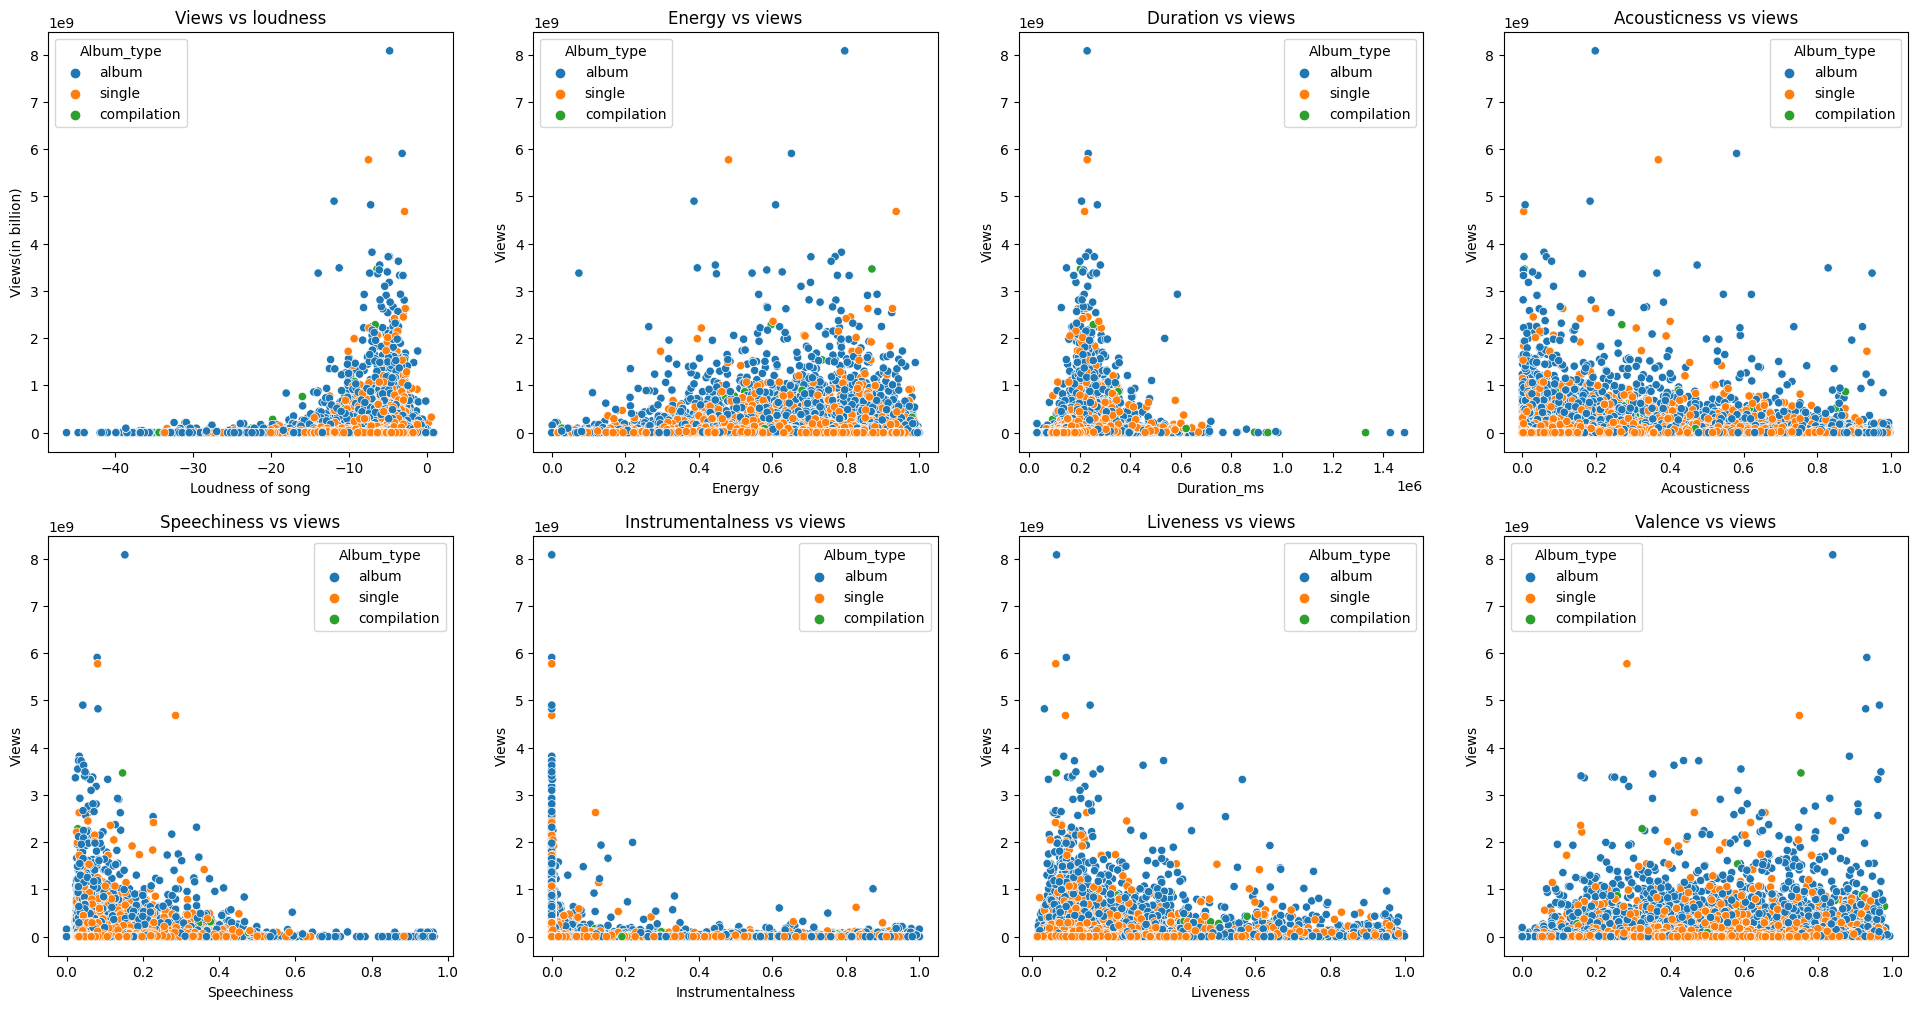

In [63]:
fig, axis = plt.subplots(2,4, figsize =(24, 12))
axis[0,0].set_title("Views vs loudness")
#plt.title()
axis[0,0].set_ylabel("Views(in billion)")
axis[0,0].set_xlabel("Loudness of song")
#axis[0,0].set_grid(True, linestyle='--', alpha=0.5)
#plt.axvspan(-1, -13, color='blue', alpha=0.2)
sns.scatterplot(x=data_df.Loudness,y=data_df.Views,hue=data_df.Album_type,ax=axis[0,0])
#axis[0,1]
axis[0,1].set_title('Energy vs views')
sns.scatterplot(x=data_df.Energy,y=data_df.Views,hue=data_df.Album_type,ax=axis[0,1])
#axis[0,2]
axis[0,2].set_title('Duration vs views')
sns.scatterplot(x=data_df.Duration_ms[data_df['Duration_ms']<2000000],y=data_df.Views,hue=data_df.Album_type,ax=axis[0,2]) #[data_df['Duration_ms']<2000000]
#axis[0,3]
axis[0,3].set_title('Acousticness vs views')
sns.scatterplot(x=data_df.Acousticness,y=data_df.Views,hue=data_df.Album_type,ax=axis[0,3])
#axis[1,0]
axis[1,0].set_title('Speechiness vs views')
sns.scatterplot(x=data_df.Speechiness,y=data_df.Views,hue=data_df.Album_type,ax=axis[1,0])
#axis[1,1]
axis[1,1].set_title('Instrumentalness vs views')
sns.scatterplot(x=data_df.Instrumentalness,y=data_df.Views,hue=data_df.Album_type,ax=axis[1,1])
#axis[1,2]
axis[1,2].set_title('Liveness vs views')
sns.scatterplot(x=data_df.Liveness,y=data_df.Views,hue=data_df.Album_type,ax=axis[1,2])
#axis[1,3]
axis[1,3].set_title('Valence vs views')
sns.scatterplot(x=data_df.Valence,y=data_df.Views,hue=data_df.Album_type,ax=axis[1,3])

###Channel with most views

In [64]:
(data_df.groupby('Channel')['Views'].sum()).mean()

289829304.279918

In [65]:
channel_df = data_df[data_df['Channel'] != 'unknown']['Views'].groupby(data_df['Channel']).sum() #to remove unknown from chart
channel_df=channel_df.sort_values(ascending=False)[:100]

Text(0.5, 0, 'Name of channels')

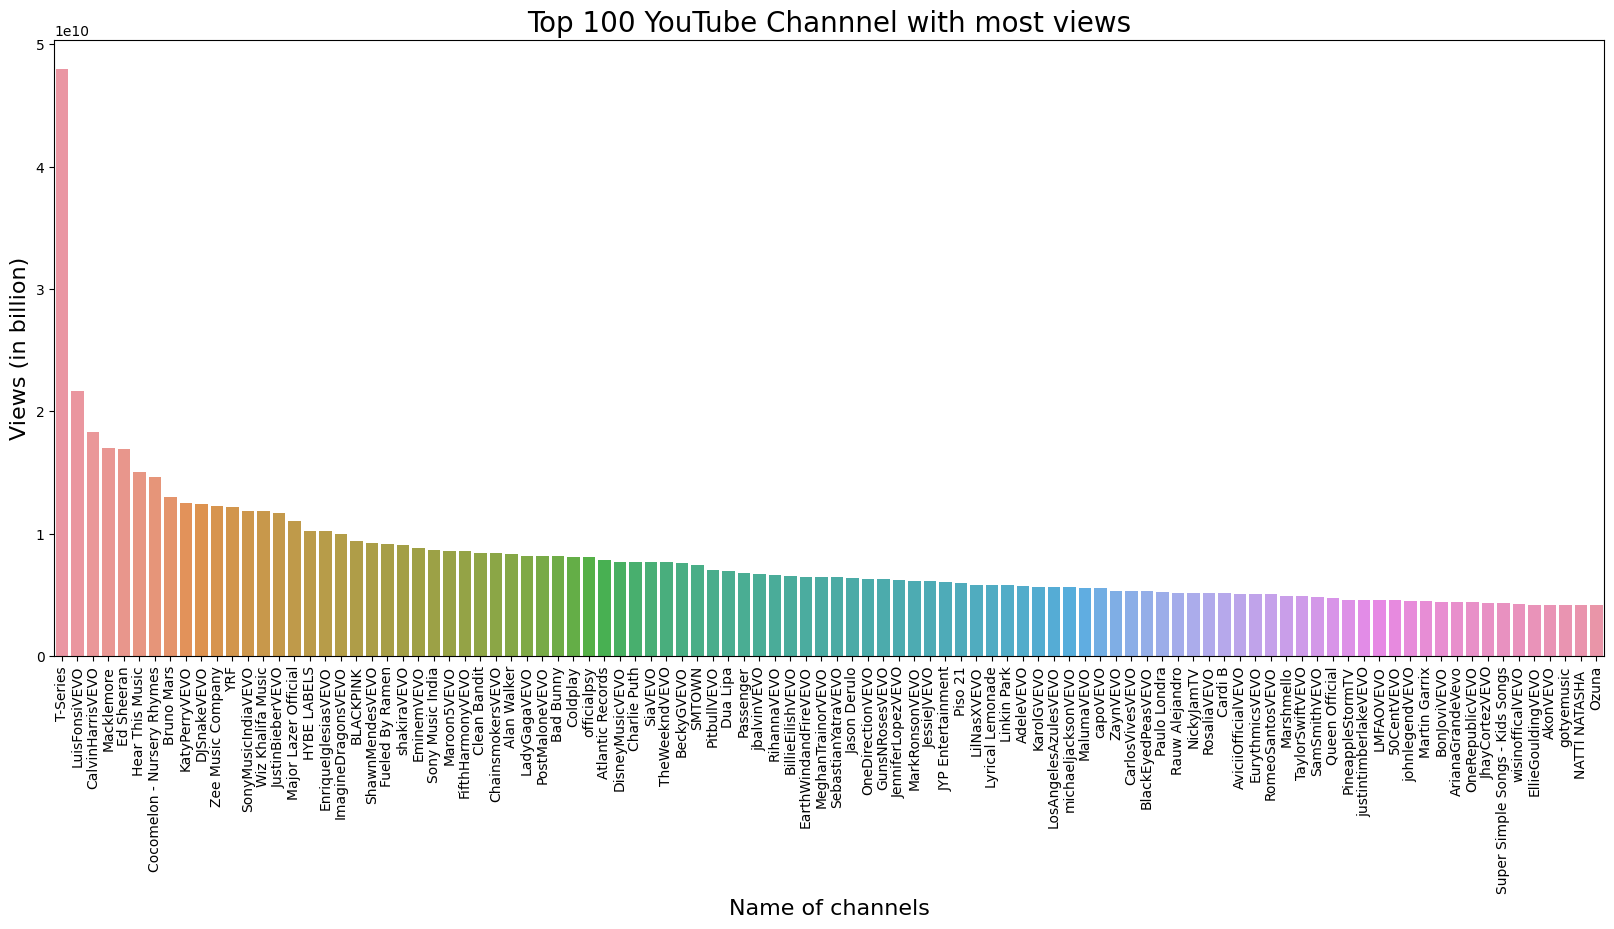

In [66]:

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(y=channel_df.values,x=channel_df.index);
plt.title('Top 100 YouTube Channnel with most views',fontsize=20)
plt.ylabel("Views (in billion)",fontsize=16)
plt.xlabel("Name of channels",fontsize=16)

Based on the data from the chart, it is evident that T-series possesses the largest number of views among the channels analyzed. This indicates that T-series has a significant and substantial viewership or subscriber base on the platform. Following closely behind T-series is Luis Fonsi Vevo, suggesting that this channel has also garnered a considerable amount of followers. In the third position, we find Calvin Harris Vevo, which indicates a respectable level of popularity and engagement with their content. Overall, this information highlights the relative ranking of these channels based on their follower count, with T-series leading, followed by Luis Fonsi Vevo, and Calvin Harris Vevo securing the third position.

###Licensed

In the context of YouTube, the term "licensed" refers to content that has obtained the proper legal rights and permissions to include copyrighted material. When a video or audio track is labeled as "licensed" on YouTube, it signifies that the creator has acquired the necessary authorizations, typically through licensing agreements or partnerships, to incorporate copyrighted material into their content without violating the rights of the original copyright owner. This typically pertains to the usage of music, movie clips, TV show excerpts, or other copyrighted material within YouTube videos.

In [67]:
data_df.Licensed.unique()

array([True, False, 'unknown'], dtype=object)

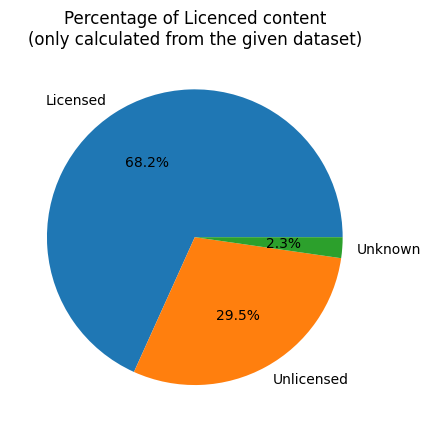

In [68]:
plt.title("Percentage of Licenced content\n(only calculated from the given dataset)")
labels = ['Licensed', 'Unlicensed', 'Unknown']
plt.pie(data_df['Licensed'].value_counts(),labels=labels, autopct='%1.1f%%');

From the dataset, it can be observed that 68.2% of the documents are labeled as licensed. This indicates that a significant portion of the content has obtained the necessary permissions and rights to use copyrighted material. On the other hand, approximately 29.5% of the documents are categorized as unlicensed, implying that they do not have the required authorizations for copyrighted material.

However, it is worth noting that there is missing data for the remaining percentage. This missing data represents documents for which the licensing information is unavailable or not specified. Therefore, it is crucial to consider that the dataset may not provide a complete picture of the licensing status for all documents.

In [69]:
import jovian

##Exploration

### Q: Which artists have the highest number of tracks in the dataset?

In [70]:
highest_num_track=data_df.groupby('Artist')['Track'].count() #making group of atrtist and number of songs
highest_num_tracks=highest_num_track.sort_values(ascending=False)

In [71]:
artist_name = highest_num_tracks.index[0]
track_count = highest_num_tracks.iloc[0]

print("Artist with the highest number of tracks:", artist_name)
print("Number of tracks:", track_count)

Artist with the highest number of tracks: (G)I-DLE
Number of tracks: 10


It seems that the artist (G)I-DLE has the most number of tracks in your dataset with a total of 10 tracks. It's interesting to see an artist with such a significant presence in your data. You can further analyze their tracks or explore other aspects of their music in relation to the dataset.

### Q: Which tracks have the highest and lowest values for attributes like danceability, energy, loudness, etc.?

In [72]:
highest_dance_df=data_df.sort_values('Danceability',ascending=False)
highest_energy_df=data_df.sort_values('Energy',ascending=False)
higest_loudness=data_df.sort_values('Loudness',ascending=True)

In [73]:
print('The song with highest Danceability is:{} and its danceability of the song is: {}'.format(highest_dance_df['Danceability'][0],highest_dance_df['Track'][0]))
print('The song with lowest Danceability is:{} and its danceability of the song is: {}'.format(highest_dance_df['Danceability'].iloc[-1],highest_dance_df['Track'].iloc[-1]))
print('The song with highest Energy is:{} and its Energy of the song is: {}'.format(highest_dance_df['Energy'][0],highest_dance_df['Track'][0]))
print('The song with lowest Energy is:{} and its Energy of the song is: {}'.format(highest_dance_df['Energy'].iloc[-1],highest_dance_df['Track'].iloc[-1]))
print('The song with highest Loudness is:{} and its Loudness of the song is: {}'.format(highest_dance_df['Loudness'][0],highest_dance_df['Track'][0]))
print('The song with lowest Loudness is:{} and its Loudness of the song is: {}'.format(highest_dance_df['Loudness'].iloc[-1],highest_dance_df['Track'].iloc[-1]))

The song with highest Danceability is:0.818 and its danceability of the song is: Feel Good Inc.
The song with lowest Danceability is:0.0 and its danceability of the song is: Clean White Noise - Loopable with no fade
The song with highest Energy is:0.705 and its Energy of the song is: Feel Good Inc.
The song with lowest Energy is:0.00342 and its Energy of the song is: Clean White Noise - Loopable with no fade
The song with highest Loudness is:-6.679 and its Loudness of the song is: Feel Good Inc.
The song with lowest Loudness is:-28.46 and its Loudness of the song is: Clean White Noise - Loopable with no fade


The song with the highest danceability is 'Feel Good Inc.' with a danceability value of 0.818. On the other hand, the song with the lowest danceability is 'Clean White Noise - Loopable with no fade' with a danceability value of 0.0. Similarly, the song with the highest energy is 'Feel Good Inc.' with an energy value of 0.705, while the song with the lowest energy is 'Clean White Noise - Loopable with no fade' with an energy value of 0.00342. Lastly, the song with the highest loudness is 'Feel Good Inc.' with a loudness value of -6.679, and the song with the lowest loudness is 'Clean White Noise - Loopable with no fade' with a loudness value of -28.46.

### Q: Is there a correlation between the number of views, likes, and comments on YouTube?

In [75]:
comments_df = data_df[data_df['Comments']!= 'unknown']

In [76]:
comments = np.asarray(comments_df['Comments'], dtype=np.float64)
likes=np.asarray(comments_df['Likes'],dtype=np.float64)
views = np.asarray(comments_df['Views'], dtype=np.float64)

comment_corr = np.corrcoef(comments, views)[0, 1]
likes_corr=np.corrcoef(likes,views)[0,1]
likes_comm_corr=np.corrcoef(likes,comments)[0,1]
print("Correlation coefficient of comment and views:", comment_corr)
print("Correlation coefficient of likes and views:", likes_corr)
print("Correlation coefficient of likes and comments:", likes_comm_corr)


Correlation coefficient of comment and views: nan
Correlation coefficient of likes and views: 0.8909488488433887
Correlation coefficient of likes and comments: nan


<Axes: title={'center': 'Likes VS Comments'}, xlabel='Comments', ylabel='Likes'>

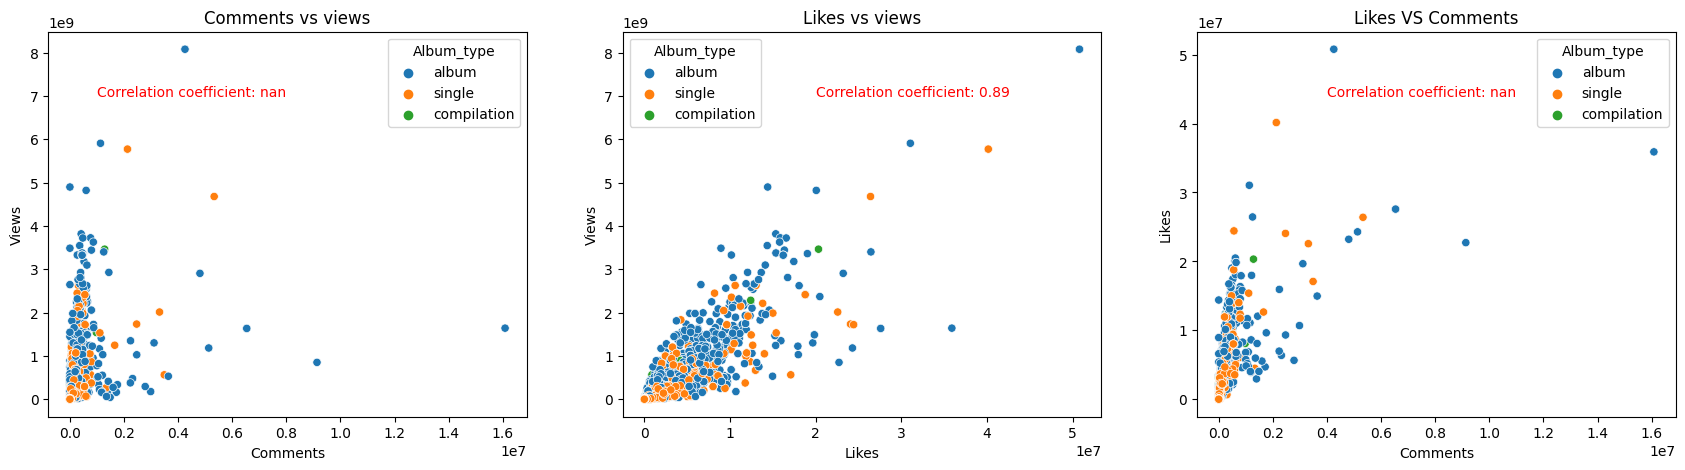

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5))
axes[0].set_title('Comments vs views')
axes[0].text(1*10e5, 7*10e8, "Correlation coefficient: {:.2f}".format(comment_corr), color='red')
sns.scatterplot(x=comments_df.Comments, y=comments_df.Views, hue=data_df.Album_type, ax=axes[0])
axes[1].set_title('Likes vs views')
axes[1].text(2*10e6, 7*10e8, "Correlation coefficient: {:.2f}".format(likes_corr), color='red')
sns.scatterplot(x=comments_df.Likes, y=comments_df.Views, hue=data_df.Album_type, ax=axes[1])
axes[2].set_title('Likes VS Comments')
axes[2].text(.4*10e6, 4.4*10e6, "Correlation coefficient: {:.2f}".format(likes_comm_corr), color='red')
sns.scatterplot(x=comments_df.Comments,y=comments_df.Likes,hue=data_df.Album_type,ax=axes[2])

The correlation coefficients reveal interesting relationships between the variables. The correlation coefficient of 0.8911 between views and likes suggests a strong positive association, indicating that as the number of views increases, there tends to be a higher number of likes. Furthermore, the correlation coefficient of 0.431 between comments and views indicates a moderate positive correlation, suggesting that as the number of views increases, there tends to be a moderate increase in the number of comments. Additionally, the correlation coefficient of 0.63 between comments and likes suggests a relatively strong positive correlation, implying that as the number of likes increases, there tends to be a higher number of comments

### Q:Which is the track with most Views.

In [78]:
Most_views = data_df.sort_values("Views", ascending=False)['Track'].iloc[0]
most_views_num= data_df.sort_values("Views", ascending=False)['Views'].iloc[0]

In [79]:
print("the song with most Views is \" {} \" with views of {}".format(Most_views,most_views_num))

the song with most Views is " Despacito " with views of 8079649362.0


### Q: Which artist has the highest average number of views, likes, or comments? Are there any significant differences between artists in terms of their track performance?

In [74]:
data_df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [80]:
artist_avg_likes=data_df.groupby('Artist')['Likes'].sum()/data_df.groupby('Artist')['Likes'].count()
artist_avg_comm=data_df.groupby('Artist')['Comments'].sum()/data_df.groupby('Artist')['Comments'].count()
artist_avg_views=data_df.groupby('Artist')['Views'].sum()/data_df.groupby('Artist')['Views'].count()

In [85]:
#aranging data in decending order
artist_avg_likes=artist_avg_likes.sort_values(ascending=False)
artist_avg_comms=artist_avg_comm.sort_values(ascending=False)
artist_avg_views=artist_avg_views.sort_values(ascending=False)

In [95]:
print("The artist {} has the most Views per song and the value is {}".format(artist_avg_views.index[0],artist_avg_views.iloc[0]))
print("The artist {} has the most likes per song and the value is {}.".format(artist_avg_likes.index[0],artist_avg_likes.iloc[0]))
print("The artist {} has the most comments per song and the value is {}.".format(artist_avg_comm.index[0],artist_avg_comm.iloc[0]))

The artist (G)I-DLE has the most Views per song and the value is 175495394.1
The artist BTS has the most likes per song and the value is 13940380.8.
The artist (G)I-DLE has the most comments per song and the value is 145624.6.


The following artists have the highest metrics per song in the given dataset:

(G)I-DLE has the most views per song, with a value of 175,495,394.1.
BTS has the most likes per song, with a value of 13,940,380.8.
(G)I-DLE has the most comments per song, with a value of 145,624.6.
These findings suggest that (G)I-DLE has the highest average number of views and comments per song, while BTS has the highest average number of likes per song.

In [ ]:
jovian.commit()

## Inferences and Conclusion

Based on the scatter plot analysis, it appears that there is no strong correlation between the energy of a song and its number of views. The distribution of views seems to be fairly consistent across different energy levels. This suggests that the energy of a song does not play a significant role in determining its popularity or viewer engagement.

It's important to note that the lack of correlation between energy and views does not imply that energy has no impact on a song's success. There could be other factors influencing the popularity of a song, such as the artist's reputation, marketing efforts, genre, lyrics, or cultural context. Additionally, individual preferences and tastes of listeners can vary, and what one person considers energetic may differ from another person's perception.

* (G)I-DLE has the most tracks in the dataset, indicating their significant 
presence within the data.

* The song "Feel Good Inc." by (G)I-DLE has the highest danceability, energy, and loudness values, while "Clean White Noise - Loopable with no fade" has the lowest values.

* Correlation coefficients indicate strong positive associations between views and likes, moderate positive correlation between views and comments, and a relatively strong positive correlation between likes and comments.

* (G)I-DLE has the highest average views and comments per song, while BTS has the highest average likes per song.

* These findings suggest that (G)I-DLE and BTS are prominent artists within the dataset, with (G)I-DLE's tracks attracting more views and comments per song, and BTS receiving a higher average number of likes per song.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work
Dataset link-https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

opendatasets Python library: https://github.com/JovianML/opendatasets

Data Visualization in Python: https://medium.com/@siddhardhan23/data-visualization-in-python-a90ddb706b23

**Future Work**:

* Further analyze the relationship between audio features and track performance metrics to identify key factors influencing popularity.
* Explore the impact of album type on track performance and audience engagement.
Develop predictive models to forecast the number of views, likes, and comments for new tracks based on their audio features.
* Investigate temporal trends in track performance and analyze the effect of release dates and promotional strategies.
* Compare the performance of different artists and genres to gain insights into audience preferences.
* Implement recommendation systems based on track attributes and user preferences to enhance music discovery.
* Incorporate sentiment analysis of comments to gain deeper insights into audience reactions and opinions.
* Explore the relationship between track performance and external factors such as marketing campaigns, collaborations, or public events.
* Conduct further statistical analysis and hypothesis testing to validate the observed correlations and trends.
* Visualize the geographical distribution of views, likes, and comments to understand regional preferences and trends in the dataset.








In [ ]:
import jovian

In [ ]:
jovian.commit()